<a href="https://colab.research.google.com/github/JANANIAG21/CROP-RECOMENDER/blob/main/Autism_Prediction_08_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

In [ ]:
uploaded = files.upload()
import io

Saving Autism_Data.csv to Autism_Data.csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['Autism_Data.csv']))

In [ ]:
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice,Autism,Country_Of_Residence,Used_app_Before,Result,Age_Description,Relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [ ]:
dataset.shape

(704, 21)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   A1_Score              704 non-null    int64  
 1   A2_Score              704 non-null    int64  
 2   A3_Score              704 non-null    int64  
 3   A4_Score              704 non-null    int64  
 4   A5_Score              704 non-null    int64  
 5   A6_Score              704 non-null    int64  
 6   A7_Score              704 non-null    int64  
 7   A8_Score              704 non-null    int64  
 8   A9_Score              704 non-null    int64  
 9   A10_Score             704 non-null    int64  
 10  Age                   702 non-null    float64
 11  Gender                704 non-null    object 
 12  Ethnicity             704 non-null    object 
 13  Jaundice              704 non-null    object 
 14  Autism                704 non-null    object 
 15  Country_Of_Residence  7

In [ ]:
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
dataset.isna().sum()

A1_Score                0
A2_Score                0
A3_Score                0
A4_Score                0
A5_Score                0
A6_Score                0
A7_Score                0
A8_Score                0
A9_Score                0
A10_Score               0
Age                     2
Gender                  0
Ethnicity               0
Jaundice                0
Autism                  0
Country_Of_Residence    0
Used_app_Before         0
Result                  0
Age_Description         0
Relation                0
Class/ASD               0
dtype: int64

In [ ]:
dataset['Class/ASD'].value_counts()

Class/ASD
NO     515
YES    189
Name: count, dtype: int64

<Axes: title={'center': 'Count of Diagnosis of Autism'}, xlabel='Class/ASD'>

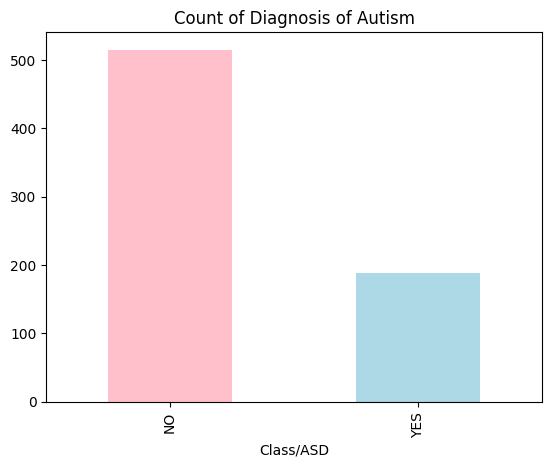

In [ ]:
dataset['Class/ASD'].value_counts().plot(kind='bar',color=['pink','lightblue'],title="Count of Diagnosis of Autism")

In [ ]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Autism', 'Country_Of_Residence',
       'Used_app_Before', 'Result', 'Age_Description', 'Relation',
       'Class/ASD'],
      dtype='object')

In [ ]:
dataset.dropna(inplace=True)
dataset.shape

(702, 21)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
dataset['Age']=le.fit_transform(dataset[['Age']])
dataset['Gender']=le.fit_transform(dataset[['Gender']])
dataset['Ethnicity']=le.fit_transform(dataset[['Ethnicity']])
dataset['Jaundice']=le.fit_transform(dataset[['Jaundice']])
dataset['Country_Of_Residence']=le.fit_transform(dataset[['Country_Of_Residence']])
dataset['Result']=le.fit_transform(dataset[['Result']])
dataset['Age_Description']=le.fit_transform(dataset[['Age_Description']])
dataset['Relation']=le.fit_transform(dataset[['Relation']])
dataset['Class/ASD']=le.fit_transform(dataset[['Class/ASD']])
dataset['Used_app_Before']=le.fit_transform(dataset[['Used_app_Before']])
dataset['Autism']=le.fit_transform(dataset[['Autism']])

<Axes: >

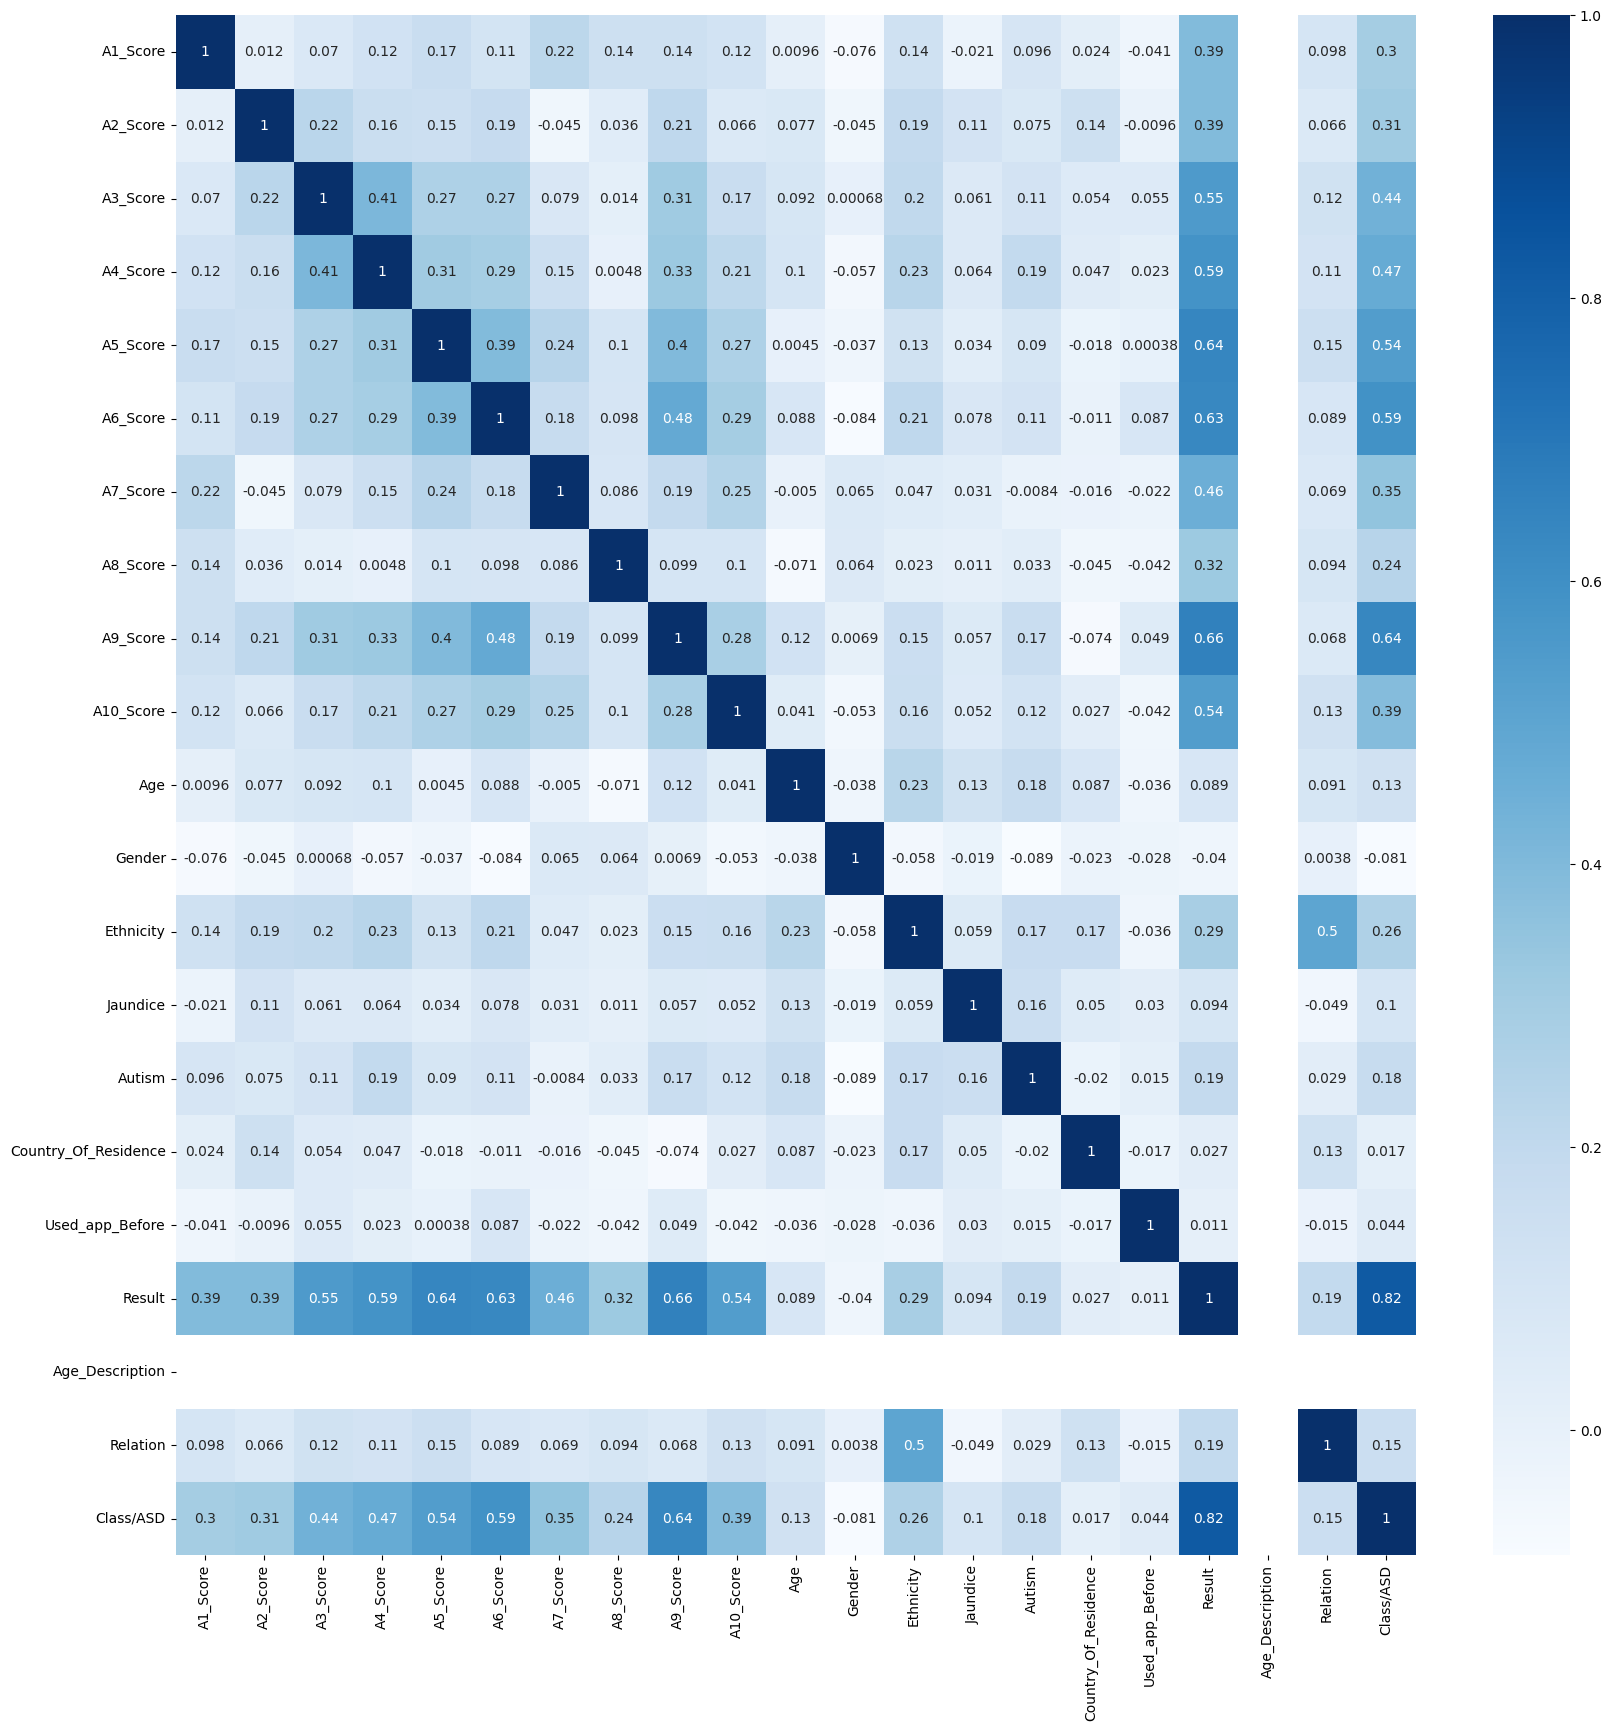

In [ ]:
import seaborn as sns
plt.figure(figsize = (20, 20))
sns.heatmap(dataset.corr(), annot = True, cmap = 'Blues')

In [ ]:
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice,Autism,Country_Of_Residence,Used_app_Before,Result,Age_Description,Relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,10,0,0,64,0,6,0,5,0
1,1,1,0,1,0,0,0,1,0,1,...,1,4,0,1,13,0,5,0,5,0
2,1,1,0,1,1,0,1,1,1,1,...,1,4,1,1,56,0,8,0,3,1
3,1,1,0,1,0,0,1,1,0,1,...,0,10,0,1,64,0,6,0,5,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,22,0,2,0,0,0


In [ ]:
dataset.mode()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice,Autism,Country_Of_Residence,Used_app_Before,Result,Age_Description,Relation,Class/ASD
0,1,0,0,0,0,0,0,1,0,1,...,1,10,0,0,64,0,4,0,5,0


In [ ]:
dataset = dataset.replace(to_replace = "?", value=0)

In [ ]:
x = dataset.drop(['Class/ASD'],axis=1)
y = dataset['Class/ASD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

====== CONFUSION MATRIX OF LOGISTIC REGRESSION MODEL ====== 
 [[102   0]
 [  0  39]]
========== ACCURACY OF LOGISTIC REGRESSION MODEL ========== 
		 1.0
====== CLASSIFICATION REPORT OF LOGISTIC REGRESSION MODEL ======
                0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    102.0  39.0       1.0      141.0         141.0


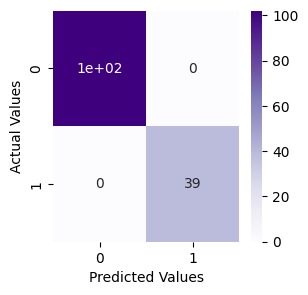

In [ ]:
model1 = linear_model.LogisticRegression()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
cm1 = confusion_matrix(y_test,y_pred1)
print("====== CONFUSION MATRIX OF LOGISTIC REGRESSION MODEL ====== \n",cm1)
print("========== ACCURACY OF LOGISTIC REGRESSION MODEL ========== \n\t\t",model1.score(x_test,y_test))
model1_report = pd.DataFrame(classification_report(y_test,y_pred1,output_dict = True ))
print("====== CLASSIFICATION REPORT OF LOGISTIC REGRESSION MODEL ======\n",model1_report)
plt.figure(figsize = (3,3))
sns.heatmap(cm1, annot = True,cmap = 'Purples')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF K-NEAREST NEIGHBOR MODEL ====== 
 [[99  3]
 [22 17]]
========== ACCURACY OF K-NEAREST NEIGHBOR MODEL ========== 
		 0.8226950354609929
====== CLASSIFICATION REPORT OF K-NEAREST NEIGHBOR MODEL ======
                     0          1  accuracy   macro avg  weighted avg
precision    0.818182   0.850000  0.822695    0.834091      0.826983
recall       0.970588   0.435897  0.822695    0.703243      0.822695
f1-score     0.887892   0.576271  0.822695    0.732082      0.801699
support    102.000000  39.000000  0.822695  141.000000    141.000000


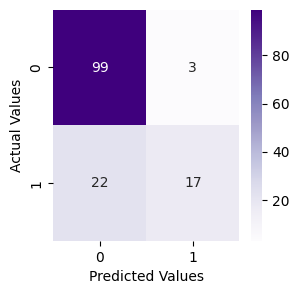

In [ ]:
model2 = KNeighborsClassifier(n_neighbors = 10)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
cm2 = confusion_matrix(y_test,y_pred2)
print("====== CONFUSION MATRIX OF K-NEAREST NEIGHBOR MODEL ====== \n",cm2)
print("========== ACCURACY OF K-NEAREST NEIGHBOR MODEL ========== \n\t\t",model2.score(x_test,y_test))
model2_report = pd.DataFrame(classification_report(y_test,y_pred2,output_dict = True ))
print("====== CLASSIFICATION REPORT OF K-NEAREST NEIGHBOR MODEL ======\n",model2_report)
plt.figure(figsize = (3,3))
sns.heatmap(cm2, annot = True,cmap = 'Purples')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF NAIVE BAYES MODEL ====== 
 [[101   1]
 [  1  38]]
========== ACCURACY OF NAIVE BAYES MODEL ========== 
		 0.9858156028368794
====== CLASSIFICATION REPORT OF NAIVE BAYES MODEL ======
                     0          1  accuracy   macro avg  weighted avg
precision    0.990196   0.974359  0.985816    0.982278      0.985816
recall       0.990196   0.974359  0.985816    0.982278      0.985816
f1-score     0.990196   0.974359  0.985816    0.982278      0.985816
support    102.000000  39.000000  0.985816  141.000000    141.000000


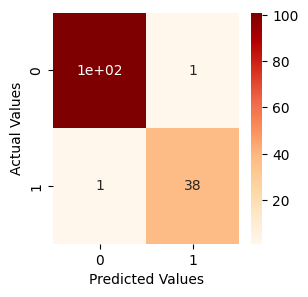

In [ ]:
model3 = GaussianNB ()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
cm3 = confusion_matrix(y_test,y_pred3)
print("====== CONFUSION MATRIX OF NAIVE BAYES MODEL ====== \n",cm3)
print("========== ACCURACY OF NAIVE BAYES MODEL ========== \n\t\t",model3.score(x_test,y_test))
model3_report = pd.DataFrame(classification_report(y_test,y_pred3,output_dict = True ))
print("====== CLASSIFICATION REPORT OF NAIVE BAYES MODEL ======\n",model3_report)
plt.figure(figsize = (3,3))
sns.heatmap(cm3, annot = True,cmap = 'OrRd')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF SUPPORT VECTOR MACHINE MODEL ====== 
 [[102   0]
 [ 17  22]]
========== ACCURACY OF SUPPORT VECTOR MACHINE MODEL ========== 
		 0.8794326241134752
====== CLASSIFICATION REPORT OF SUPPORT VECTOR MODEL ======
                     0          1  accuracy   macro avg  weighted avg
precision    0.857143   1.000000  0.879433    0.928571      0.896657
recall       1.000000   0.564103  0.879433    0.782051      0.879433
f1-score     0.923077   0.721311  0.879433    0.822194      0.867269
support    102.000000  39.000000  0.879433  141.000000    141.000000


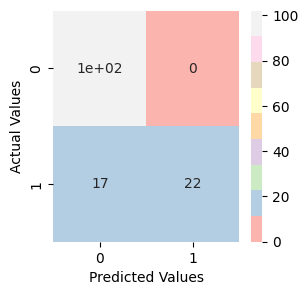

In [ ]:
model4 = SVC()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
cm4 = confusion_matrix(y_test,y_pred4)
print("====== CONFUSION MATRIX OF SUPPORT VECTOR MACHINE MODEL ====== \n",cm4)
print("========== ACCURACY OF SUPPORT VECTOR MACHINE MODEL ========== \n\t\t",model4.score(x_test,y_test))
model4_report = pd.DataFrame(classification_report(y_test,y_pred4,output_dict = True ))
print("====== CLASSIFICATION REPORT OF SUPPORT VECTOR MODEL ======\n",model4_report)
plt.figure(figsize = (3,3))
sns.heatmap(cm4, annot = True,cmap = 'Pastel1')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF DECISION TREE MODEL ====== 
 [[102   0]
 [  0  39]]
========== ACCURACY OF DECISION TREE MODEL ========== 
		 1.0
====== CLASSIFICATION REPORT OF DECISION TREE MODEL ======
                0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    102.0  39.0       1.0      141.0         141.0


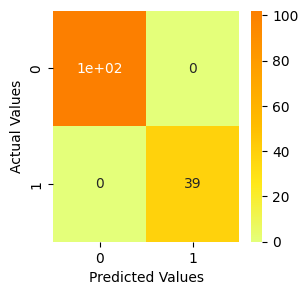

In [ ]:
model5 = DecisionTreeClassifier(random_state=4)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
cm5 = confusion_matrix(y_test,y_pred5)
print("====== CONFUSION MATRIX OF DECISION TREE MODEL ====== \n",cm5)
print("========== ACCURACY OF DECISION TREE MODEL ========== \n\t\t",model5.score(x_test,y_test))
model5_report = pd.DataFrame(classification_report(y_test,y_pred5,output_dict = True ))
print("====== CLASSIFICATION REPORT OF DECISION TREE MODEL ======\n",model5_report)
plt.figure(figsize = (3,3))
sns.heatmap(cm5, annot = True,cmap = 'Wistia')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF RANDOM FOREST MODEL ====== 
 [[102   0]
 [  5  34]]
========== ACCURACY OF RANDOM FOREST MODEL ========== 
		 0.9645390070921985
====== CLASSIFICATION REPORT OF RANDOM FOREST MODEL ======
                     0          1  accuracy   macro avg  weighted avg
precision    0.953271   1.000000  0.964539    0.976636      0.966196
recall       1.000000   0.871795  0.964539    0.935897      0.964539
f1-score     0.976077   0.931507  0.964539    0.953792      0.963749
support    102.000000  39.000000  0.964539  141.000000    141.000000


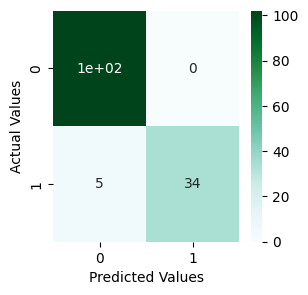

In [ ]:
model6 = RandomForestClassifier(n_estimators=4)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
cm6 = confusion_matrix(y_test,y_pred6)
print("====== CONFUSION MATRIX OF RANDOM FOREST MODEL ====== \n",cm6)
print("========== ACCURACY OF RANDOM FOREST MODEL ========== \n\t\t",model6.score(x_test,y_test))
model6_report = pd.DataFrame(classification_report(y_test,y_pred6,output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST MODEL ======\n",model6_report)
plt.figure(figsize = (3,3))
sns.heatmap(cm6, annot = True,cmap = 'BuGn')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
print("Accuracy of Logistic Regression model:    ",model1.score(x_test,y_test))
print("Accuracy of K-Nearest Neighbor model:     ",model2.score(x_test,y_test))
print("Accuracy of Naive Bayes model:            ",model3.score(x_test,y_test))
print("Accuracy of Support Vector Machine model: ",model4.score(x_test,y_test))
print("Accuracy of Decision Tree model:          ",model5.score(x_test,y_test))
print("Accuracy of Random Forest model:          ",model6.score(x_test,y_test))

Accuracy of Logistic Regression model:     1.0
Accuracy of K-Nearest Neighbor model:      0.8226950354609929
Accuracy of Naive Bayes model:             0.9858156028368794
Accuracy of Support Vector Machine model:  0.8794326241134752
Accuracy of Decision Tree model:           1.0
Accuracy of Random Forest model:           0.9645390070921985
